In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
mu = np.asarray([1,1])
mu[0]

1

***3. Isocontours of Gaussian Distributions***

In [72]:
def compute_gauss_matrix(m,s,X,Y):
    z = np.empty_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            data_pt = np.array([X[i][j], Y[i][j]])
            numer = np.exp(- (data_pt-m).T @ (np.linalg.inv(s) @ (data_pt-m))) # e^(- (x-mu)T * S^-1 * (x-mu))
            denom = np.sqrt((2 * np.pi) ** 2 * np.linalg.det(s))
            z_pt = numer / denom
            z[i][j] = z_pt
    return z

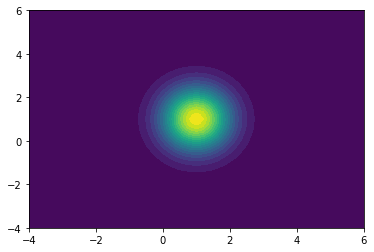

In [73]:
mu = np.asarray([1, 1])
sigma = np.array([[1, 0],[0, 2]])
X, Y = np.meshgrid(np.linspace(mu[0]-5, mu[0]+5, 51), np.linspace(mu[0]-5, mu[1]+5, 51))

Z = compute_gauss_matrix(mu, sigma,X,Y)
plt.contourf(X, Y, Z, 20)



<a list of 13 text.Text objects>

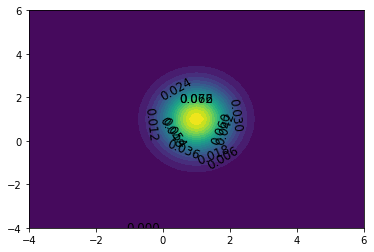

In [74]:
mu = np.asarray([1, 1])
sigma = np.array([[1, 0],[0, 2]])
X, Y = np.meshgrid(np.linspace(mu[0]-5, mu[0]+5, 51), np.linspace(mu[0]-5, mu[1]+5, 51))

Z = compute_gauss_matrix(mu, sigma,X,Y)
p = plt.contourf(X, Y, Z, 20)
plt.clabel(p, inline=False, fontsize=12, colors = 'black')

<a list of 15 text.Text objects>

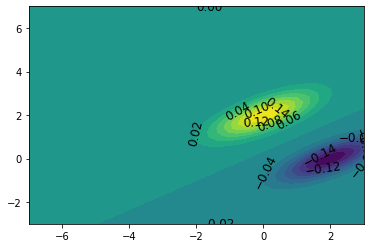

In [75]:
mu_1 = np.asarray([0, 2])
mu_2 = np.asarray([2,0])
sigma = np.array([[2, 1],[1, 1]])

X, Y = np.meshgrid(np.linspace(mu_1[0] - mu_2[0] - 5, mu_1[0] - mu_2[0] + 5, 51), 
                    np.linspace(mu_1[1] - mu_2[1] - 5, mu_1[1] - mu_2[1] + 5, 51))

Z_1 = compute_gauss_matrix(mu_1, sigma, X , Y)
Z_2 = compute_gauss_matrix(mu_2, sigma, X, Y)
p = plt.contourf(X, Y, Z_1 - Z_2, 20)
plt.clabel(p, inline=False, fontsize=12, colors = 'black')

<a list of 11 text.Text objects>

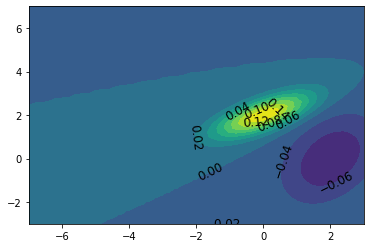

In [76]:
mu_1 = np.asarray([0, 2])
mu_2 = np.asarray([2,0])
sigma_1 = np.array([[2, 1],[1, 1]])
sigma_2 = np.array([[2,1],[1,4]])
X, Y = np.meshgrid(np.linspace(mu_1[0] - mu_2[0] - 5, mu_1[0] - mu_2[0] + 5, 51), 
                    np.linspace(mu_1[1] - mu_2[1] - 5, mu_1[1] - mu_2[1] + 5, 51))

Z_1 = compute_gauss_matrix(mu_1, sigma_1, X , Y)
Z_2 = compute_gauss_matrix(mu_2, sigma_2, X, Y)
p = plt.contourf(X, Y, Z_1 - Z_2, 10)
plt.clabel(p, inline=False, fontsize=12, colors = 'black')

<a list of 17 text.Text objects>

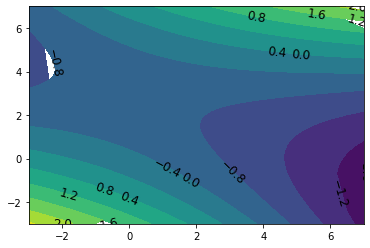

In [62]:
mu_1 = np.asarray([1,1])
mu_2 = np.asarray([-1,-1])
sigma_1 = np.array([[2, 0],[0, 1]])
sigma_2 = np.array([[2,1],[1,2]])

X, Y = np.meshgrid(np.linspace(mu_1[0] - mu_2[0] - 5, mu_1[0] - mu_2[0] + 5, 51), 
                    np.linspace(mu_1[1] - mu_2[1] - 5, mu_1[1] - mu_2[1] + 5, 51))

Z_1 = compute_gauss_matrix(mu_1, sigma_1, X , Y)
Z_2 = compute_gauss_matrix(mu_2, sigma_2, X, Y)
p = plt.contourf(X, Y, Z_1 - Z_2, 10)
plt.clabel(p, fontsize=12, colors = 'black')

In [9]:
def gauss(x, y, m, s):
    X = np.vstack((x,y)).T
    sigma_inv = np.linalg.inv(sigma)
    print(sigma_inv)
    exp_comp = np.matmul((X-mu[None,...]).T, np.matmul(sigma_inv, X-mu[None,...])) / -2
    print(exp_comp)
    numer = np.exp(exp_comp)
    # denom = np.sqrt((2 * np.pi) ** 2 * np.linalg.det(sigma))
    z = numer

mu = np.array([[1],[1]])
sigma = np.array([[1, 0],[0, 2]])
X, Y = np.meshgrid(np.linspace(-1, 1, 51), np.linspace(-1, 1, 51))
Z = gauss(X, Y, mu, sigma)
print(Z)

[[1.  0. ]
 [0.  0.5]]


ValueError: operands could not be broadcast together with shapes (51,102) (1,2,1) 

In [25]:
plt.contour??

Signature: plt.contour(*args, data=None, **kwargs)
Docstring:
Plot contour lines.

Call signature::

    contour([X, Y,] Z, [levels], **kwargs)

`.contour` and `.contourf` draw contour lines and filled contours,
respectively.  Except as noted, function signatures and return values
are the same for both versions.

Parameters
----------
X, Y : array-like, optional
    The coordinates of the values in *Z*.

    *X* and *Y* must both be 2D with the same shape as *Z* (e.g.
    created via `numpy.meshgrid`), or they must both be 1-D such
    that ``len(X) == N`` is the number of columns in *Z* and
    ``len(Y) == M`` is the number of rows in *Z*.

    *X* and *Y* must both be ordered monotonically.

    If not given, they are assumed to be integer indices, i.e.
    ``X = range(N)``, ``Y = range(M)``.

Z : (M, N) array-like
    The height values over which the contour is drawn.

levels : int or array-like, optional
    Determines the number and positions of the contour lines / regions.

    I

/tmp/ipykernel_8189/2831060218.py:4: RuntimeWarning: divide by zero encountered in true_divide
  z = z + 1/(np.sqrt((x - p[0])**2 + (y - p[1])**2))


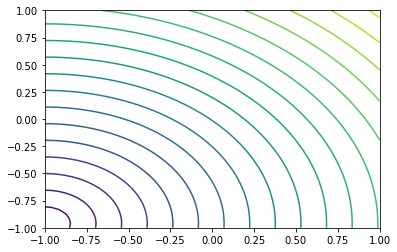

In [17]:
def f(x, y, pts):
    z = np.zeros_like(x)
    for p in pts:
        z = z + 1/(np.sqrt((x - p[0])**2 + (y - p[1])**2))
    return 1/z

b = [1, 2]

X, Y = np.meshgrid(np.linspace(-1, 1, 51), np.linspace(-1, 1, 51))
Z = f(X, Y, X)

CS = plt.contour(X, Y, Z, 20)

In [25]:
import random
nums = []
mu = np.array([[1],[1]])
sigma = np.array([[1, 0],[0, 2]])

for i in range(1000):
    temp = random.gauss(mu, sigma)
    nums.append(temp)
nums[0]

array([[-1.00787188,  1.        ],
       [ 1.        , -3.01574376]])